In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from matplotlib import pyplot



In [3]:
# pd.read_csv('Orig_LASP_telemetry_data/BatteryTempCPV6Averaged.csv').head(1000).to_csv('Orig_LASP_telemetry_data/1000BatteryTempCPV6Averaged.csv', index=False)

In [48]:
# # exploratory data analysis
# df = pd.read_csv('Orig_LASP_telemetry_data/1000BatteryTempCPV6Averaged.csv', header=0, index_col=0, parse_dates=True)
# print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2004-02-13 13:02:30 to 2004-02-17 00:17:30
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TCPV6T (C)  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB
None


In [4]:
df = pd.read_csv('..Data/Wheel1SpeedDirection.csv', header=0, index_col=0, parse_dates=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48865494 entries, 2009-05-22 22:30:47 to 2018-10-02 18:29:56
Data columns (total 1 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ADW1SDIR (RPM)  float64
dtypes: float64(1)
memory usage: 745.6 MB
None


In [200]:
df.head()

,ADW1SDIR (RPM)
time (yyyy-MM-dd'T'HH:mm:ss.SSS),
2009-05-22 22:30:47,1264.481737
2009-05-22 22:30:48,1264.481737
2009-05-22 22:30:49,1264.176159
2009-05-22 22:30:50,1262.495480
2009-05-22 22:30:51,1263.412214


In [206]:
# print some basic statistics of the data df
print(df.describe())

       ADW1SDIR (RPM)
count    4.886549e+07
mean     1.313677e+03
std      8.883033e+01
min     -4.975726e+03
25%      1.316583e+03
50%      1.322083e+03
75%      1.326820e+03
max      4.673357e+03


array([[<Axes: title={'center': '2004'}>,
        <Axes: title={'center': '2005'}>,
        <Axes: title={'center': '2006'}>,
        <Axes: title={'center': '2007'}>],
       [<Axes: title={'center': '2008'}>,
        <Axes: title={'center': '2009'}>,
        <Axes: title={'center': '2010'}>,
        <Axes: title={'center': '2011'}>],
       [<Axes: title={'center': '2012'}>,
        <Axes: title={'center': '2013'}>,
        <Axes: title={'center': '2014'}>,
        <Axes: title={'center': '2015'}>],
       [<Axes: title={'center': '2016'}>,
        <Axes: title={'center': '2017'}>,
        <Axes: title={'center': '2018'}>, <Axes: >]], dtype=object)

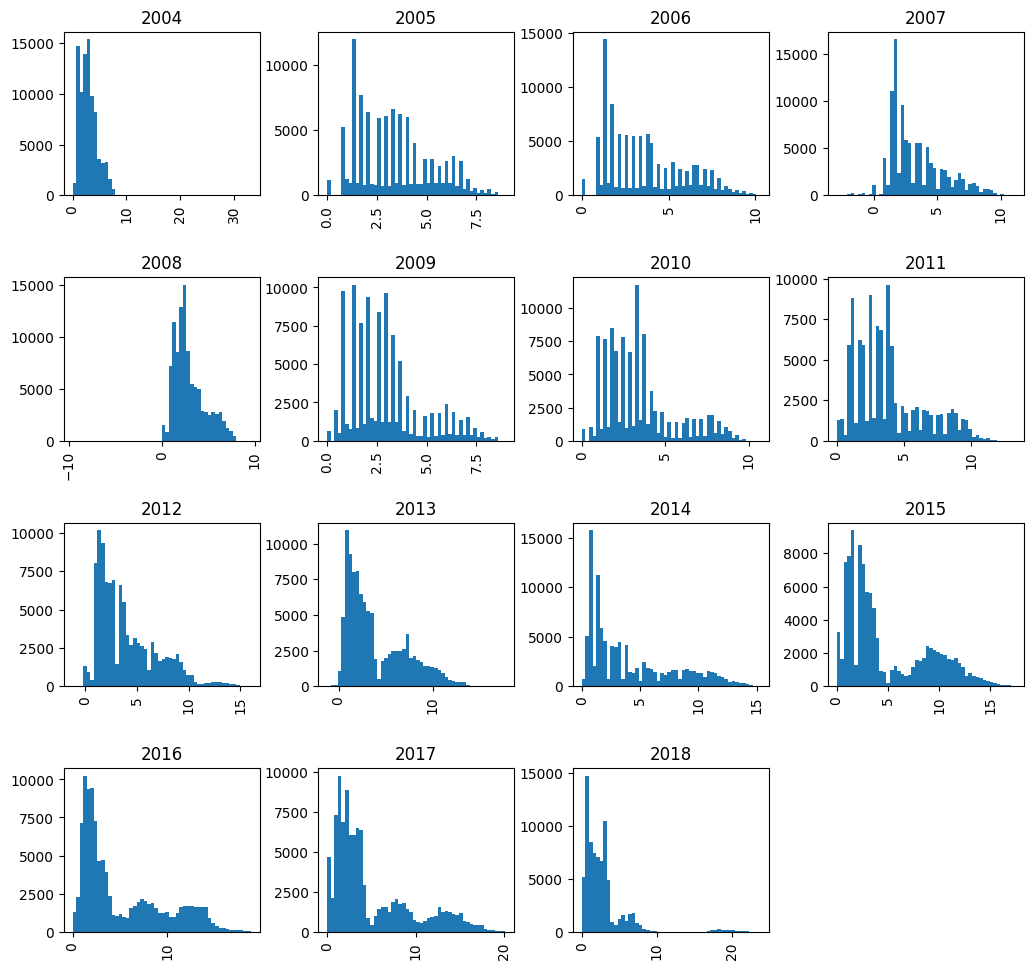

In [146]:
df['TCPV6T (C)'].hist(by=df.index.year, bins=50, figsize=(12, 12))

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>]], dtype=object)

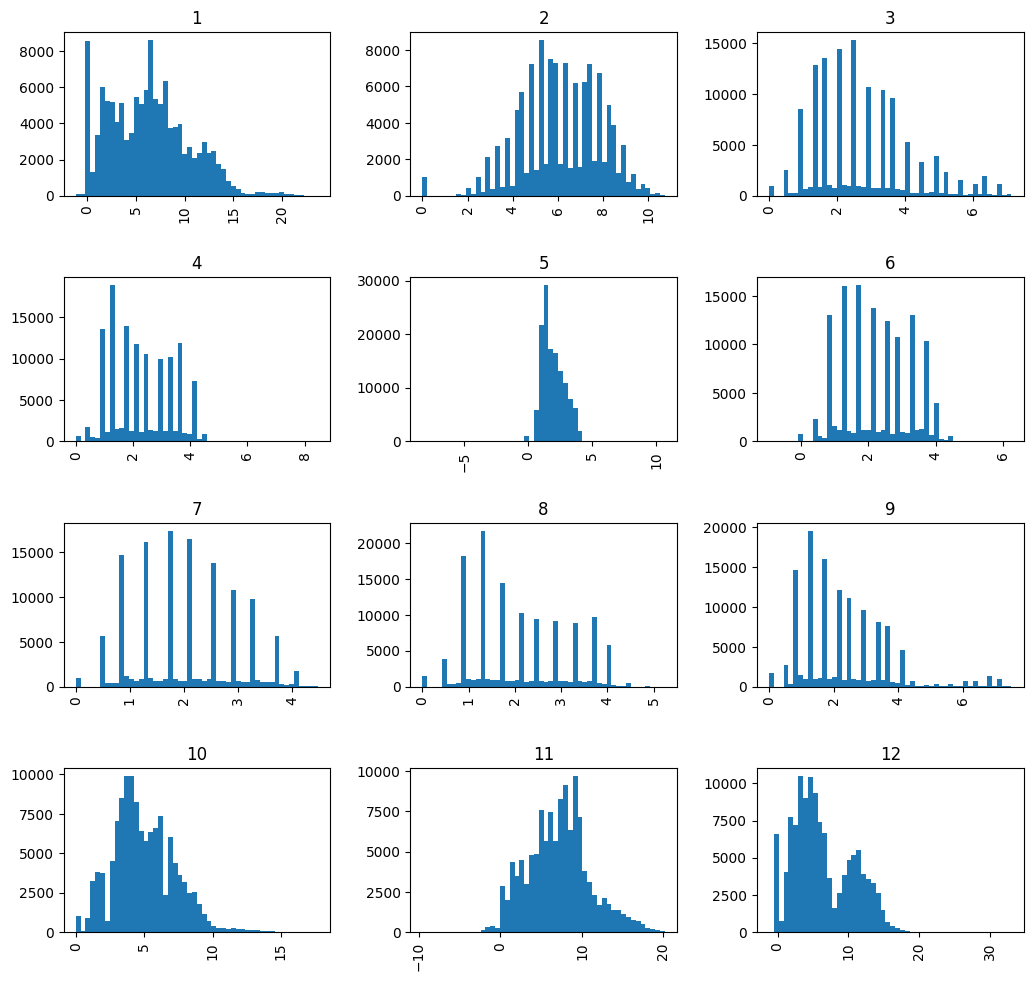

In [147]:
df.hist(by=df.index.month, bins=50, figsize=(12, 12))

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: >]], dtype=object)

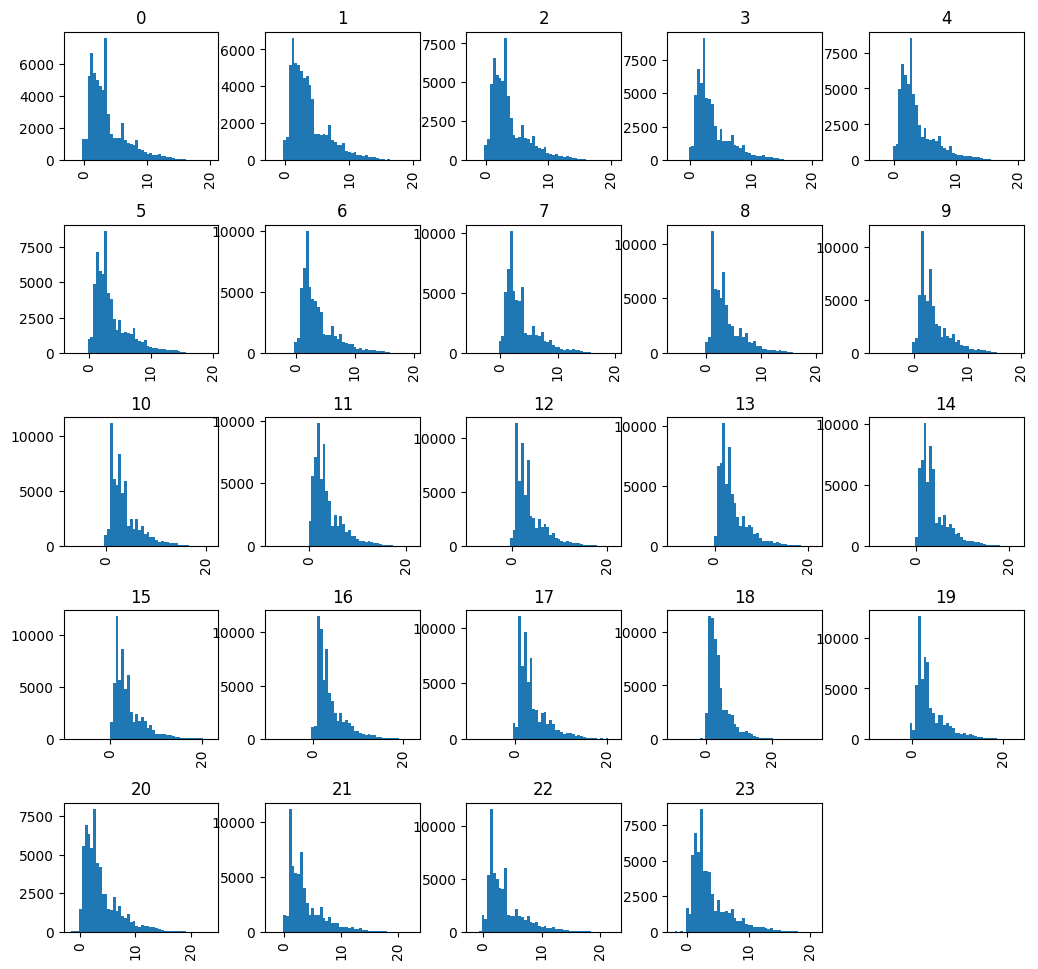

In [148]:
df.hist(by=df.index.hour, bins=50, figsize=(12, 12))

<Axes: >

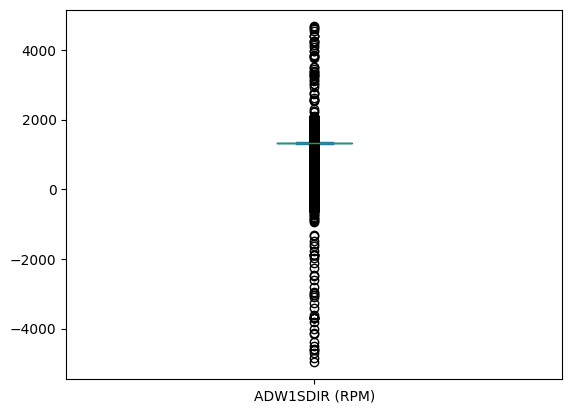

In [203]:
df['ADW1SDIR (RPM)'].plot(kind='box')

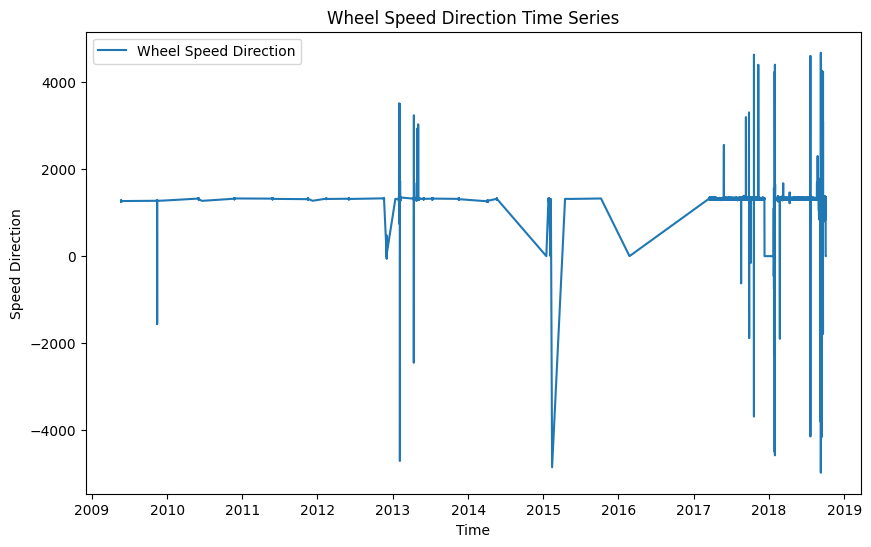

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['ADW1SDIR (RPM)'], label='Wheel Speed Direction')
plt.title('Wheel Speed Direction Time Series')
plt.xlabel('Time')
plt.ylabel('Speed Direction')
plt.legend()
plt.show()

/var/folders/85/w54y84992kq04m4tzg_y41440000gn/T/ipykernel_30734/4239082817.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('24H').mean()


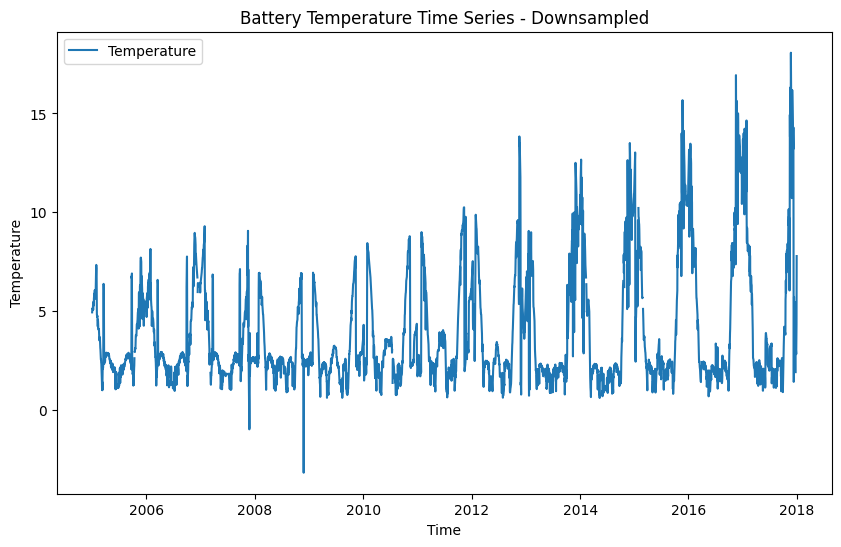

In [180]:
dataset_path = 'Data/Wheel1SpeedDirection.csv'

# Resampling the data to daily frequency
df = df.loc['2005':'2017']
df = df.resample('24H').mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TCPV6T (C)'], label='Temperature')
plt.title('Battery Temperature Time Series - Downsampled')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [6]:
# Handling missing values by linear interpolation
df.interpolate(method='linear', inplace=True)

In [7]:
# Decomposing the time series to observe trend, seasonality, and residuals
decomposition = seasonal_decompose(df['ADW1SDIR (RPM)'], model='additive', period=365)

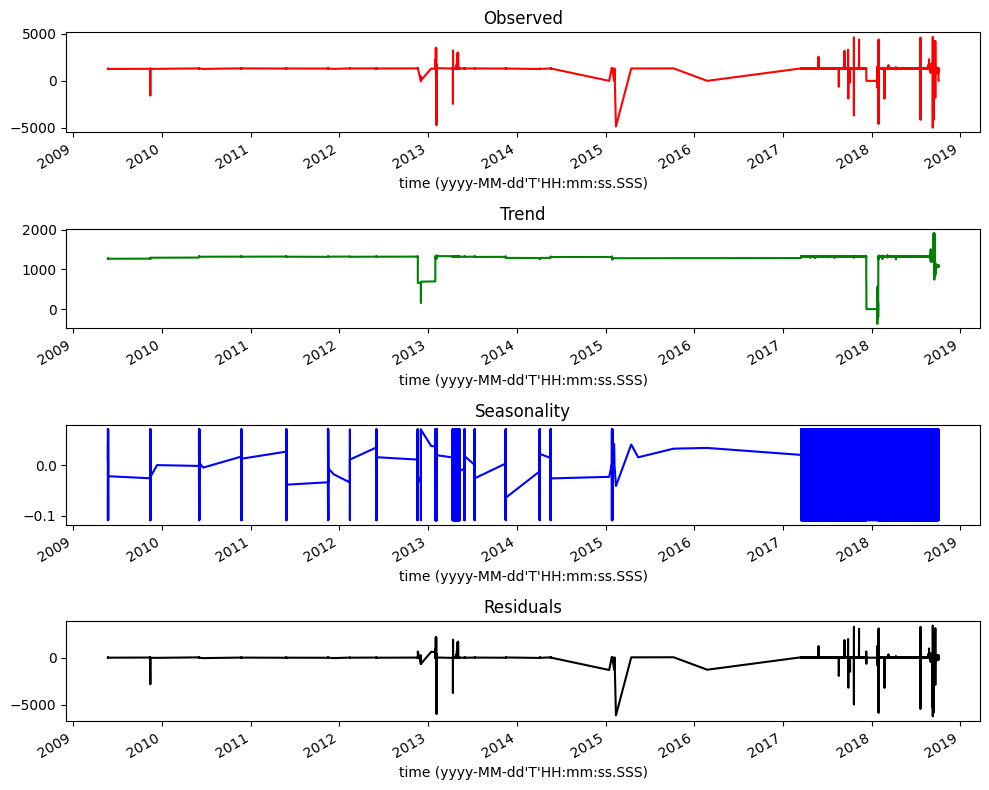

In [8]:
# Plot the decomposed components of the time series
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=ax[0], legend=False, color='r')
ax[0].set_title('Observed') # original data
decomposition.trend.plot(ax=ax[1], legend=False, color='g')
ax[1].set_title('Trend') # overall trend
decomposition.seasonal.plot(ax=ax[2], legend=False, color='b')
ax[2].set_title('Seasonality') # seasonal component
decomposition.resid.plot(ax=ax[3], legend=False, color='k')
ax[3].set_title('Residuals') # random noise
plt.tight_layout()

In [185]:
# Detecting potential outliers using Z-score (threshold = 3)
df['z_score'] = np.abs(stats.zscore(df['TCPV6T (C)']))
# np.abs(stats.zscore(df['TCPV6T (C)'])) gives the z-score of each value in the series, where z-score = (x - mean) / std

In [186]:
df.head()

,TCPV6T (C),z_score
time (yyyy-MM-dd'T'HH:mm:ss.SSS),,
2005-01-01,4.940837,0.350611
2005-01-02,5.070885,0.395117
2005-01-03,5.139393,0.418561
2005-01-04,5.149865,0.422145
2005-01-05,5.099410,0.404878


In [187]:
# change header names
df.columns = ['Temperature', 'z_score']

# change name of the index column
df.index.name = 'Date'

In [188]:
df.head()

,Temperature,z_score
Date,,
2005-01-01,4.940837,0.350611
2005-01-02,5.070885,0.395117
2005-01-03,5.139393,0.418561
2005-01-04,5.149865,0.422145
2005-01-05,5.099410,0.404878


In [189]:
outliers = df[df['z_score'] > 3]


In [190]:
outliers.shape

(83, 2)

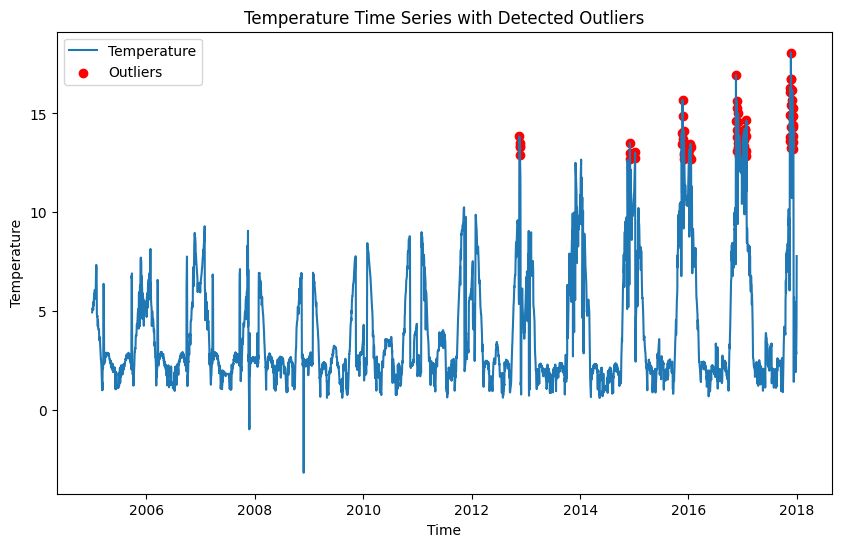

In [191]:
# Visualize the time series with highlighted outliers
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Temperature'], label='Temperature')
plt.scatter(outliers.index, outliers['Temperature'], color='red', label='Outliers')
plt.title('Temperature Time Series with Detected Outliers')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

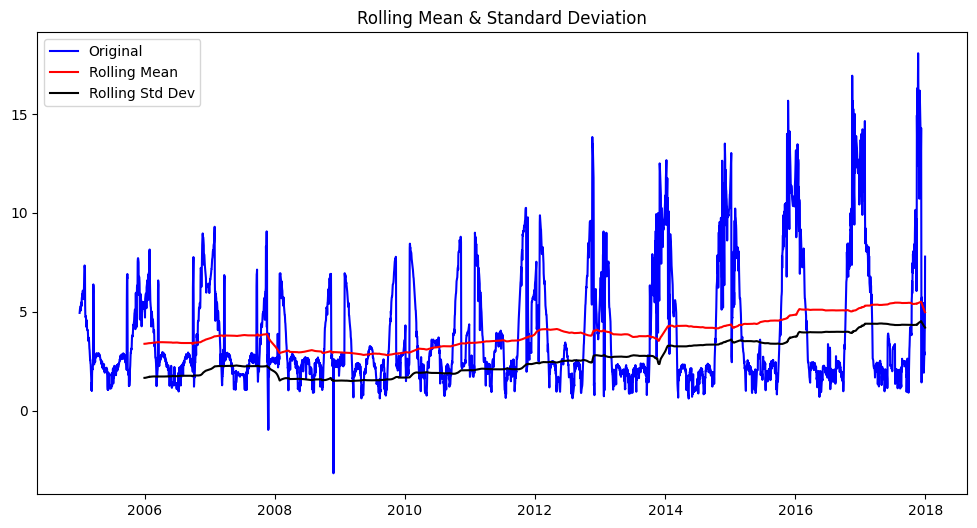

ADF Statistic: -6.409403880980559
p-value: 1.9073225502512947e-08
Critical Value 1%: -3.43173326688956
Critical Value 5%: -2.8621512467076293
Critical Value 10%: -2.567095368682647


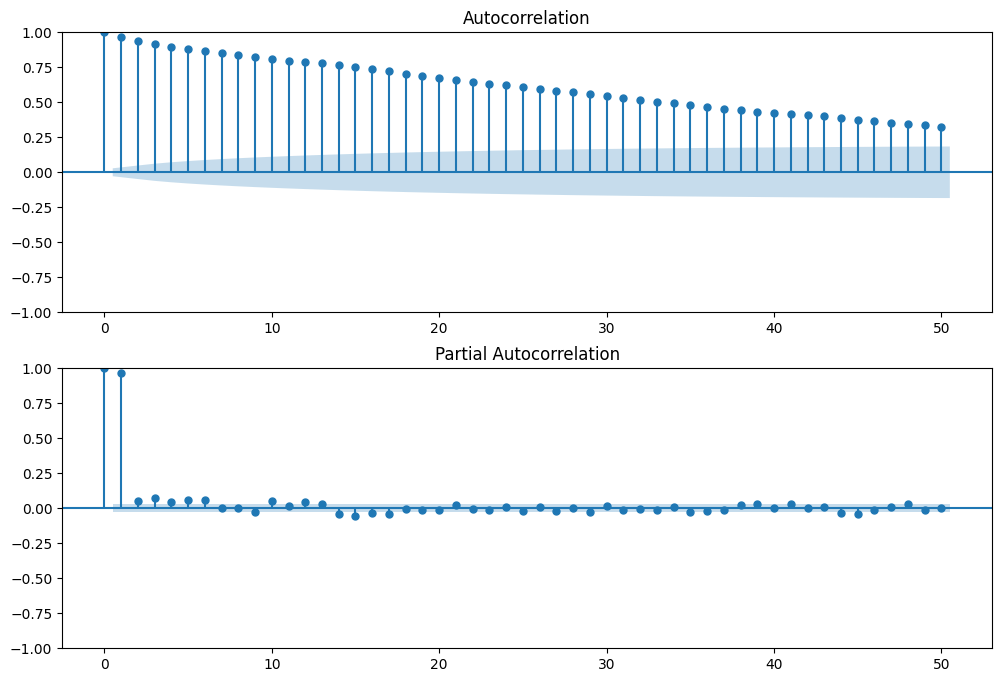

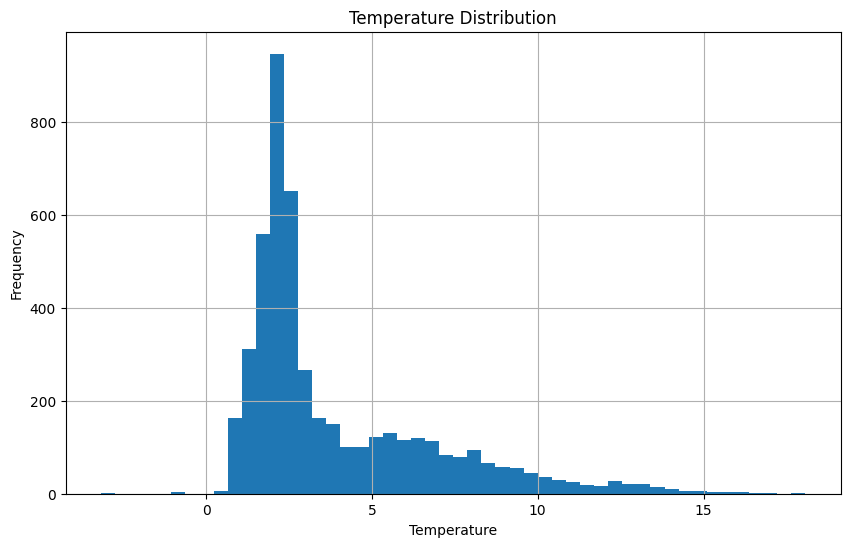

In [192]:
# Plotting Rolling Statistics for trend analysis
rolling_window = 365  # Adjust based on your dataset's frequency
df['rolling_mean'] = df['Temperature'].rolling(window=rolling_window).mean()
df['rolling_std'] = df['Temperature'].rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Temperature'], color='blue', label='Original')
plt.plot(df['rolling_mean'], color='red', label='Rolling Mean')
plt.plot(df['rolling_std'], color='black', label='Rolling Std Dev')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# ADF Test for stationarity
adf_test = adfuller(df['Temperature'], autolag='AIC')
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
for key, value in adf_test[4].items():
    print(f'Critical Value {key}: {value}')

# Autocorrelation and Partial Autocorrelation Plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Temperature'], lags=50, ax=ax1)  # Adjust lags based on your data
plot_pacf(df['Temperature'], lags=50, ax=ax2)  # Adjust lags based on your data
plt.show()

# Distribution of temperature values
plt.figure(figsize=(10, 6))
df['Temperature'].hist(bins=50)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [36]:
import datetime
import pandas as pd
from pandas import read_csv
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error

In [168]:
# !pip3 install keras
# !pip3 install tensorflow

# # Importing necessary libraries
# from keras.models import Model
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [169]:


# # Function to create a Convolutional Autoencoder model
# def create_cae(input_shape=(128, 128, 1)):
#     """
#     Create a Convolutional Autoencoder (CAE) model.
    
#     :param input_shape: The shape of the input data (height, width, channels)
#     :return: A Keras Model representing the CAE.
#     """
    
#     # Encoder
#     input_layer = Input(shape=input_shape)
#     x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
#     x = MaxPooling2D((2, 2), padding='same')(x)
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     encoded = MaxPooling2D((2, 2), padding='same')(x)
    
#     # Decoder
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
#     x = UpSampling2D((2, 2))(x)
#     x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#     x = UpSampling2D((2, 2))(x)
#     decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
#     # Autoencoder
#     autoencoder = Model(input_layer, decoded)
#     autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
#     return autoencoder

# # Creating the CAE model
# autoencoder = create_cae()
# autoencoder.summary()
